In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv ('loan_prediction.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.shape

(614, 13)

In [4]:
df.dtypes
# here we found the following datatypes in our dataset :
# there are three different types of datatypes are present in our dataset :-
# 1) 'object' = 8 columns
# 2) 'int64' = 1 column
# 3) 'float64' = 4 columns
#  total columns= 13 columns

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
column = ['loan_id','gender','marital_status','dependents','education','self_employed','applicant_income','coapplicant_income',
          'loan_amount','loan_amount_term','credit_history','property_area','loan_status']

# for further easier use, we are assigning column names into single formate (lower case)

In [7]:
df.columns=column

In [8]:
df.columns

Index(['loan_id', 'gender', 'marital_status', 'dependents', 'education',
       'self_employed', 'applicant_income', 'coapplicant_income',
       'loan_amount', 'loan_amount_term', 'credit_history', 'property_area',
       'loan_status'],
      dtype='object')

In [9]:
df.head(2)

,loan_id,gender,marital_status,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [10]:
df.columns.unique()
# Name of unique columns present in the dataset

Index(['loan_id', 'gender', 'marital_status', 'dependents', 'education',
       'self_employed', 'applicant_income', 'coapplicant_income',
       'loan_amount', 'loan_amount_term', 'credit_history', 'property_area',
       'loan_status'],
      dtype='object')

In [11]:
df.columns.nunique()
# no. of unique columns present in the dataset

13

In [12]:
df.shape

(614, 13)

In [13]:
df.info()

# total number of columns present are 614
# here in the below table we can found that , there are some columns which are having LESS THEN 614 values.
# ...that means that there may be presence of NULL VALUES in the dataset.
# No. of Columns with : float64(4), int64(1) & object(8)
# Total Number of columns (13)
# Total number of rows (614)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             614 non-null    object 
 1   gender              601 non-null    object 
 2   marital_status      611 non-null    object 
 3   dependents          599 non-null    object 
 4   education           614 non-null    object 
 5   self_employed       582 non-null    object 
 6   applicant_income    614 non-null    int64  
 7   coapplicant_income  614 non-null    float64
 8   loan_amount         592 non-null    float64
 9   loan_amount_term    600 non-null    float64
 10  credit_history      564 non-null    float64
 11  property_area       614 non-null    object 
 12  loan_status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


=================== DROPPING IRRELEVANT COLUMNS ================================

In [14]:
# here in the above list of colunms we can found that , out of all columns 'loan_id' column is NOT RELEVANT for predictions.
# so we can drop this column.

In [15]:
df.drop(['loan_id'], axis=1, inplace=True)

In [16]:
df.head(2)

,gender,marital_status,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [17]:
df.columns.nunique()
# succesfully dropped 1 ('loan_id') column

12

============== CHECKING FOR NAN-NULL VALUES ============================

In [18]:
df.isnull().sum()
# here in the below table we can find the null/nan values present in the dataset.

gender                13
marital_status         3
dependents            15
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount           22
loan_amount_term      14
credit_history        50
property_area          0
loan_status            0
dtype: int64

<AxesSubplot:>

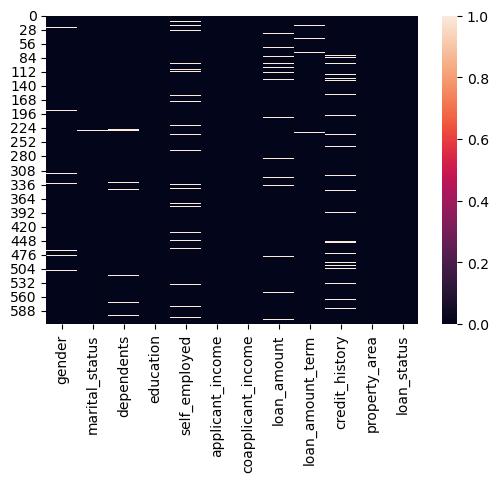

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())

# with the help of heatmap also we can clearly seen the presence of NULL VALUES , in the following columns of dataset.

========= removing nan/null values =========

In [20]:
# To remove the null values present in our dataset, we can use SIMPLE IMPUTER TECHNIQUE, for which we have to import it first.

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
#  here above as we found the NULL VALUES in : gender,  marital_status,  dependents,
#                                              self_employed,  loan_amount,  loan_amount_term,   credit_history
# out of these columns we can REPLACE NAN with = 'MOST FREQUENT VALUES' 
#  but in only 'LOAN_AMOUNT' column , we have to replace NAN with = 'MEAN'

In [23]:
imp1 = SimpleImputer(strategy="most_frequent")
#  we can replace the null values with the 'most-frequent' values present in the columns.
#  so the null values can be replaced by the most - frequent values ARRIVED in the column.

In [24]:
df.columns

Index(['gender', 'marital_status', 'dependents', 'education', 'self_employed',
       'applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [25]:
df['gender']= imp1.fit_transform(df['gender'].values.reshape(-1,1))
df['marital_status']= imp1.fit_transform(df['marital_status'].values.reshape(-1,1))
df['dependents']= imp1.fit_transform(df['dependents'].values.reshape(-1,1))
df['self_employed']= imp1.fit_transform(df['self_employed'].values.reshape(-1,1))
df['loan_amount_term']= imp1.fit_transform(df['loan_amount_term'].values.reshape(-1,1))
df['credit_history']= imp1.fit_transform(df['credit_history'].values.reshape(-1,1))

In [26]:
imp2 = SimpleImputer(strategy="mean")
#  we can replace the null values with the 'mean' values present in the columns.
#  so the null values can be replaced by the MEAN OF VALUES  in the column.

In [27]:
df['loan_amount']= imp2.fit_transform(df['loan_amount'].values.reshape(-1,1))

In [28]:
df.isnull().sum()
# here in the below table we can see that the all NULL/NAN VALUES are successfully removed from our dataset.

gender                0
marital_status        0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_amount_term      0
credit_history        0
property_area         0
loan_status           0
dtype: int64

====================== CHECKING FOR UNIQUE /CATEGORICAL, IN EACH COLUMNS ==========================================

====================== UNIVARIATE ANALYSIS =====================

In [29]:
df.columns

Index(['gender', 'marital_status', 'dependents', 'education', 'self_employed',
       'applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [30]:
#  1) Analysing GENDER COLUMN ====>>>>

In [31]:
df['gender'].unique()
# male & femoale two different unique values are present in our dataset.

array(['Male', 'Female'], dtype=object)

In [32]:
df['gender'].nunique()

2

In [33]:
df['gender'].value_counts()
# we can see that the MALE APPLICANT'S are very much HIGHER then the FEMALE APPLICANTS

Male      502
Female    112
Name: gender, dtype: int64

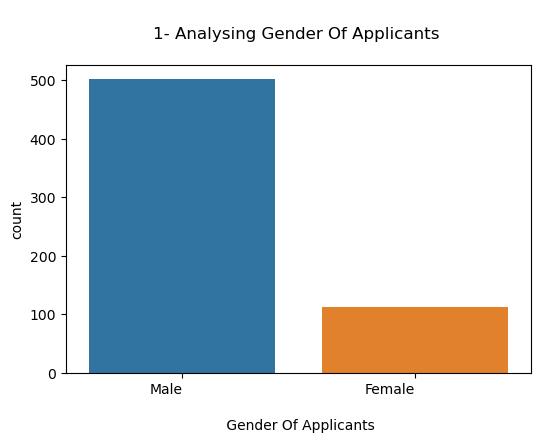

In [34]:
plt.figure(figsize = (6,4), facecolor='white')
plt.title('\n1- Analysing Gender Of Applicants \n')
sns.countplot(x='gender', data=df)
plt.xlabel('\n Gender Of Applicants', fontsize = 10)
plt.xticks(rotation=0,ha ='right')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

# here in the following bargraph we can clearly see that the MALE LOAN APPLICNATS are verymuch HIGHER then the FEMALE APPLICANTS


In [35]:
# 2) Analysing MARITAL STATUS of Applicants ======>>>>>

In [36]:
df['marital_status'].unique()
# offcourse they are YES-MARRIED OR NO-MARRIED

array(['No', 'Yes'], dtype=object)

In [37]:
df['marital_status'].nunique()

2

In [38]:
df['marital_status'].value_counts()

Yes    401
No     213
Name: marital_status, dtype: int64

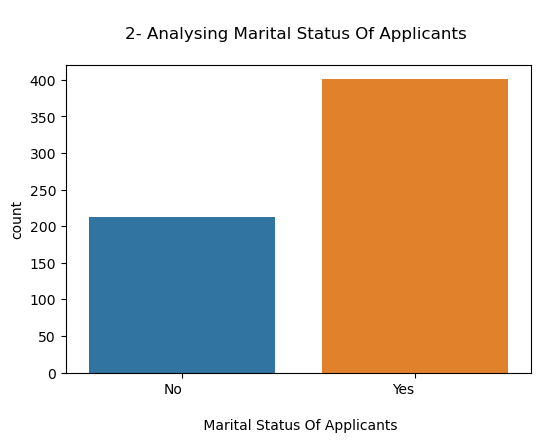

In [39]:
plt.figure(figsize = (6,4), facecolor='white')
plt.title('\n2- Analysing Marital Status Of Applicants \n')
sns.countplot(x='marital_status', data=df)
plt.xlabel('\n Marital Status Of Applicants', fontsize = 10)
plt.xticks(rotation=0,ha ='right')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

# here in the following bargraph we can clearly see that the the Number Of Married Applicants Are Almost Double then Non-Married

In [40]:
# 3) Analysing Dependents in the DataSet =====>>>>

In [41]:
df['dependents'].unique()
# here we can see that no. of unique values of dependents are following.

array(['0', '1', '2', '3+'], dtype=object)

In [42]:
df['dependents'].nunique()
# there are 4 no. of unique values are present in the dataset.

4

In [43]:
df['dependents'].value_counts()
# here we can see the distribution of dependents with the applicant.

0     360
1     102
2     101
3+     51
Name: dependents, dtype: int64

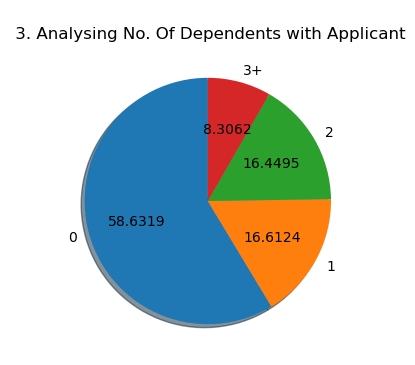

In [44]:
plt.figure(figsize=(4,4))
plt.title('\n 3. Analysing No. Of Dependents with Applicant')
plt.pie(df['dependents'].value_counts(),startangle=90,autopct='%.4f',labels=['0', '1','2','3+'],shadow= True)
plt.show()

# here in the following PIE CHART we can found that, 
# 1) Applicant with '0 dependents' = 58.63 %
# 2) Applicant with '1 dependents' = 16.61 %
# 3) Applicant with '2 dependents' = 16.44 % (1 & 2 dependent applicants are almost same)
# 4) Applicant with '3+ dependents' = 8.30 %

#  from the bleow PIE CHART it is cleared that , Highest No. Of Applicants are Having '0- dependents'- May They are BACHLERS
# & LOWEST NO. APPLICANTS are having '3+ dependents'= may they MARRIED , HAVING CHINDREN OR LIVING WITH PARENTS.

In [45]:
# 4) Analysing Education Of Applicants =====>>>>

In [46]:
df['education'].unique()
# there are only two categories 'graduate' & 'Non-Graduate'

array(['Graduate', 'Not Graduate'], dtype=object)

In [47]:
df['education'].value_counts()
# Maximum Number of applicants are GRADUATE

Graduate        480
Not Graduate    134
Name: education, dtype: int64

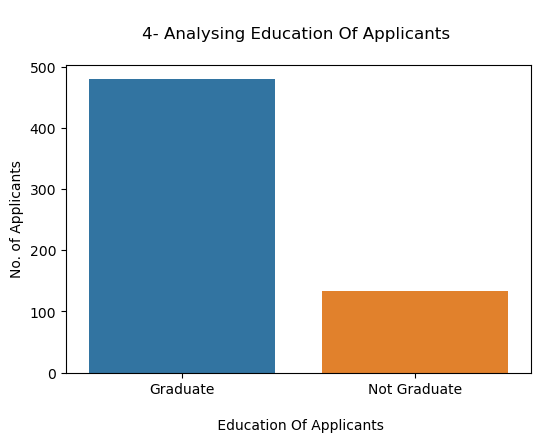

In [48]:
plt.figure(figsize = (6,4), facecolor='white')
plt.title('\n4- Analysing Education Of Applicants \n')
sns.countplot(x='education', data=df)
plt.xlabel('\n Education Of Applicants', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
plt.ylabel('No. of Applicants', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

# GRADUATE Applicants are almost more then double compared to NON-GRADUATE APPLICANTS

In [49]:
# 5) Analysing Employemnet Of Applicant =======>>>

In [50]:
df['self_employed'].unique()
# Applicant's 'self_employement' status 

array(['No', 'Yes'], dtype=object)

In [51]:
df['self_employed'].value_counts()

# here Maximum Applicants are not self_employed , that mean they may SALARIED.

No     532
Yes     82
Name: self_employed, dtype: int64

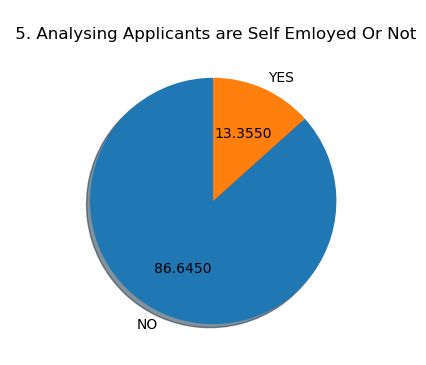

In [52]:
plt.figure(figsize=(4,4))
plt.title('\n 5. Analysing Applicants are Self Emloyed Or Not')
plt.pie(df['self_employed'].value_counts(),startangle=90,autopct='%.4f',labels=['NO', 'YES'],shadow= True)
plt.show()

# here in the following PIE CHART we can found that, 
# 1) Applicant with 'YES - SELF-EMPLOYED' = 13.35 %
# 2) Applicant with 'NO - SELF-EMPLOYED' = 86.64 %

# in the below pie chart we find that MAXIMUM NO. OF APPLICANT'S are NOT-SELF_EMPLOYED.
# that means the Maximum No. Of Applicants are may SALARIED.
# and the YES - SELF_EMPLOYED APPLICANTS are only 13.35 %

In [53]:
#  6) Analysing Applicants Income =======>>>>>>

In [54]:
df['applicant_income'].nunique()

# out of 614 columns , there are 505 unique values are present in this column.
# that means it is not a categorical column.

505

In [55]:
df['applicant_income'].min()
# here in the column the minimum vlaue of income present in the column is - $ 150

150

In [56]:
df['applicant_income'].max()
# the highest INCOME OF ANY APPLICANT is $ 81000

81000

In [57]:
df['applicant_income'].mean()

# the Mean Of Income Of All Applicant's is $ 5403

5403.459283387622

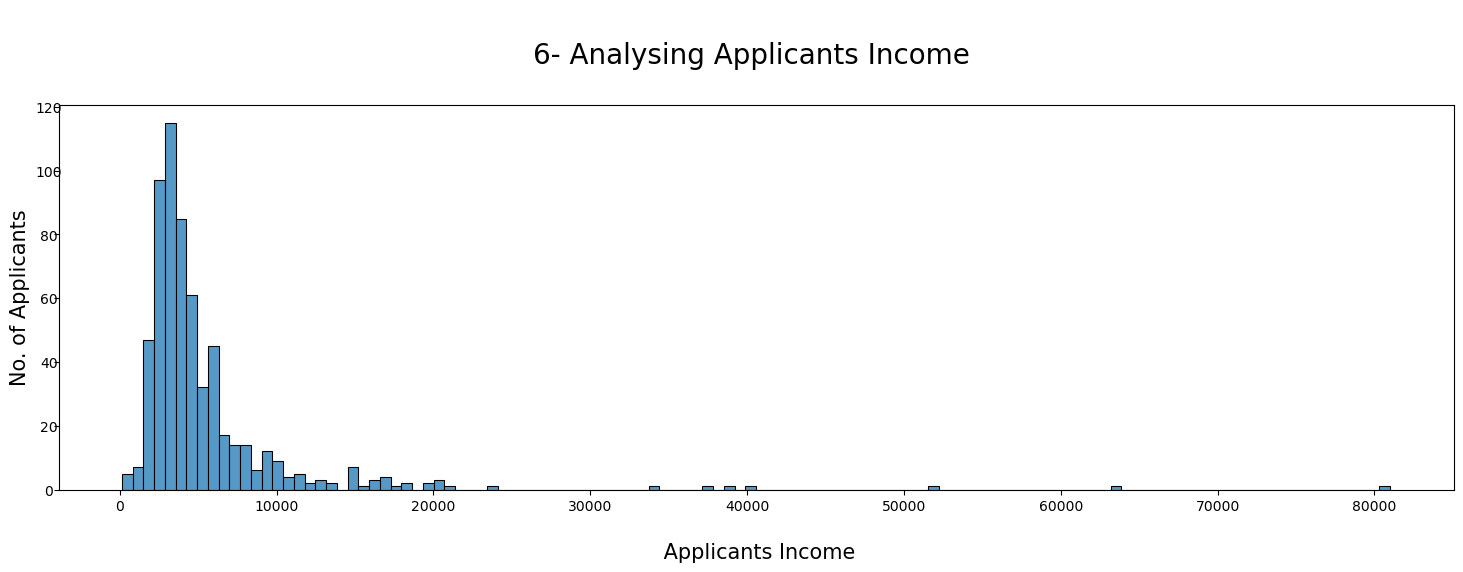

In [58]:
plt.figure(figsize = (18,5), facecolor='white')
plt.title('\n6- Analysing Applicants Income \n', fontsize=20)
sns.histplot(x='applicant_income', data=df)
plt.xlabel('\n Applicants Income', fontsize = 15)
plt.xticks(rotation=0,ha ='center')
plt.ylabel('No. of Applicants', fontsize = 15)
plt.yticks(rotation=0, ha = 'center')
plt.show()

# here as we can see in following HISTOGRAM PLOT that :
# 1) the Highest No. Of Applicants Are getting Salary in between = $ 5000 - $ 5500
# 2) Maximum No. Of Applicants are getting salary in between - $ 0 -$ 10,000
# 3) there may be presence of some of outliers on $ 50,000, $ 60,000 , $ 70 & 80,000 also
# 4) there are also few of the applicants near $ 20,000

In [59]:
# 7) Analysing Co-Applicant's Income =====>>>>>

In [60]:
df['coapplicant_income'].nunique()

# Out Of 614 values , there are only 287 unique values are present inside the column.

287

In [61]:
df['coapplicant_income'].min()

0.0

In [62]:
df['coapplicant_income'].max()
#  $ 41,667 is the Highest income of Coapplicant

41667.0

In [63]:
df['coapplicant_income'].mean()
# $ 1621 is the mean of coapplicants income.

1621.245798027101

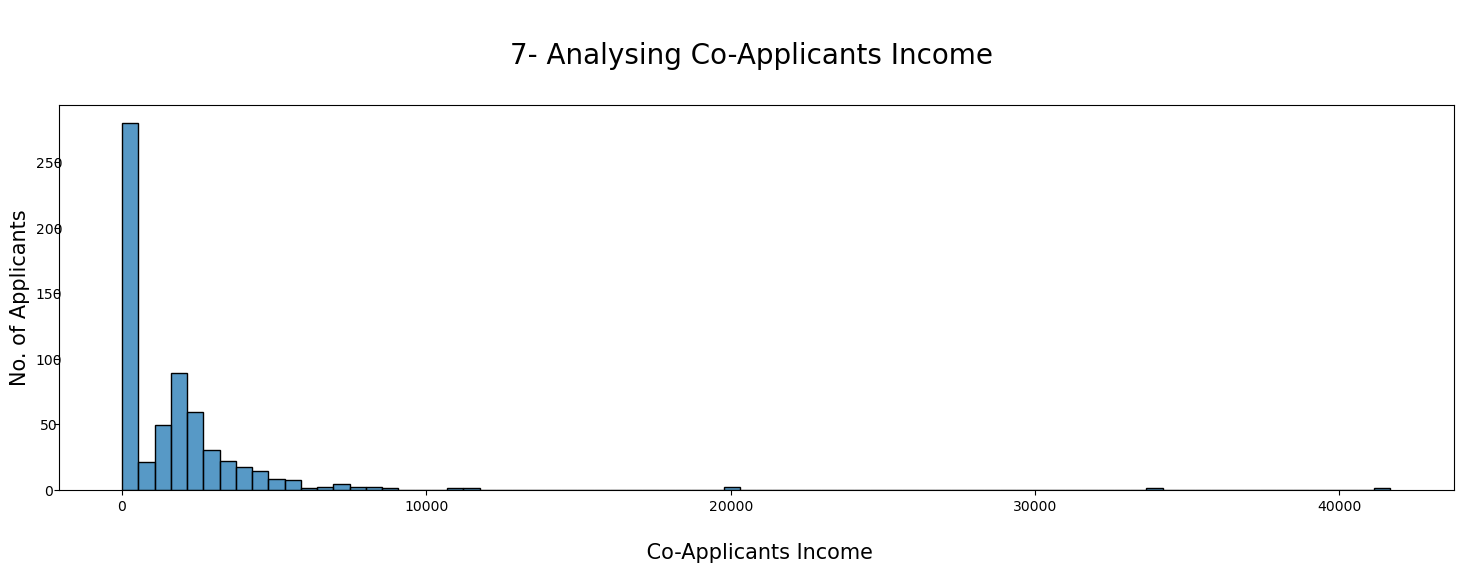

In [64]:
plt.figure(figsize = (18,5), facecolor='white')
plt.title('\n7- Analysing Co-Applicants Income \n', fontsize=20)
sns.histplot(x='coapplicant_income', data=df)
plt.xlabel('\n Co-Applicants Income', fontsize = 15)
plt.xticks(rotation=0,ha ='center')
plt.ylabel('No. of Applicants', fontsize = 15)
plt.yticks(rotation=0, ha = 'center')
plt.show()

# here as we can see in following HISTOGRAM PLOT that :
# 1) the Highest No. Of Co-Applicants Are getting Salary in between = $ 0 - $ 1000
# 2) Maximum No. Of Co-Applicants are getting salary in between - $ 0 -$ 8,000
# 3) there may be presence of some of outliers on $ 20,000, $ 30,000 , $ 40,000 also
# 4) there are also few of the Co-applicants are above $ 40,000

In [65]:
# 8) Analysing Required Loan_Amount by Applicants ==========>>>>> 

In [66]:
df['loan_amount'].nunique()
# 204 no. of unique values are present , outof 614

204

In [67]:
df['loan_amount'].min()

# the Minimum Required Loan Amount by any applicant is only $ 9.0 (it may be in thousands)

9.0

In [68]:
df['loan_amount'].max()

# the Highest Required Loan Amount by an Any Applicant is $ 700.0

700.0

In [69]:
df['loan_amount'].mean()

# the mean of all reqired loan amount quoted by applicants is $ 146

146.41216216216213

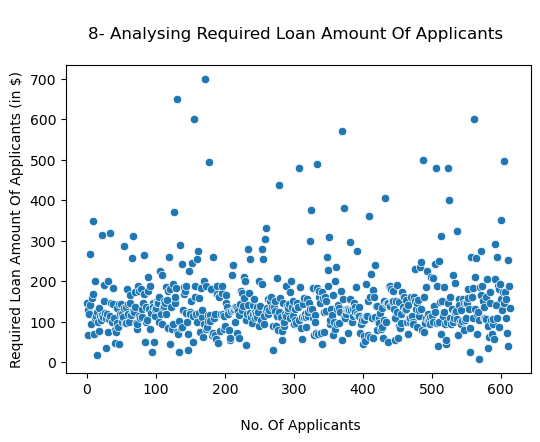

In [70]:
plt.figure(figsize = (6,4), facecolor='white')
plt.title('\n8- Analysing Required Loan Amount Of Applicants \n')
sns.scatterplot(x=df.index,y='loan_amount', data=df)
plt.xlabel('\n No. Of Applicants', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
plt.ylabel('Required Loan Amount Of Applicants (in $)', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

# here in the below scatter plot , we find that the Most of Applicant are applied for the amount between $ 0 - $ 200
# there are few of the applicants who applied for $ 500, 600 & 700 also.
# but the density is highest in between $ 0 - $ 200 only.

In [71]:
# 9) Analysing Term For Loan Amount =======>>>>>>

In [72]:
df['loan_amount_term'].unique()
# following are the unique TERM which are assigned as a LOAN DURATION

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [73]:
df['loan_amount_term'].nunique()
# there are 10 numbers of unique values are present in the column.

10

In [74]:
df['loan_amount_term'].min()
# the MINIMUM REQUIRED TERM FOR LOAN is 12 Months

12.0

In [75]:
df['loan_amount_term'].max()
# the MAXIMUM REQUIED TERM FOR LOAN IS 480 months (40 years)

480.0

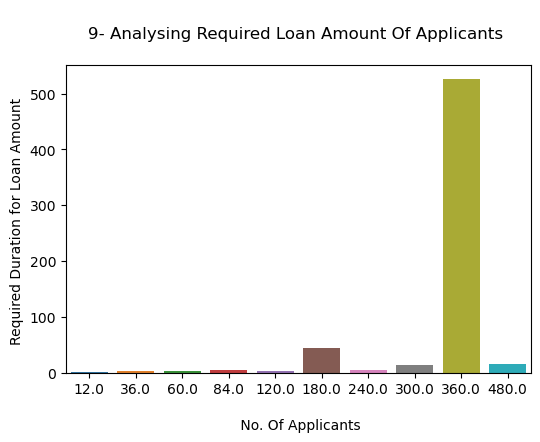

In [76]:
plt.figure(figsize = (6,4), facecolor='white')
plt.title('\n9- Analysing Required Loan Amount Of Applicants \n')
sns.countplot(x='loan_amount_term', data=df)
plt.xlabel('\n No. Of Applicants', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
plt.ylabel('Required Duration for Loan Amount ', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

# here in the below bar plot , we find that the Highest No. of Applicant are applied for the DURATION of = 360 Months [30 years]
# the 2nd Highest No. of Applicants who applied for the duration of = 180 months [15 years]
# there are few of the applicants who applied for $ 480 Months & 300 Months [40 Years] & [25 Years] also.
# very few of the applicants are applied for the duration of 12, 36,60,84, & 120 months
# the LOWEST NO. OF APPLICANTS are applied for 12 Months (1  year)

In [77]:
#  10) Analysing Credit Histroy Of Applicants =======>>>>>

In [78]:
df['credit_history'].unique()
# there is only 1 & 0 unique value present inside the column.

array([1., 0.])

In [79]:
df['credit_history'].value_counts()

# Highest Numbers of applicants with credit history-1

1.0    525
0.0     89
Name: credit_history, dtype: int64

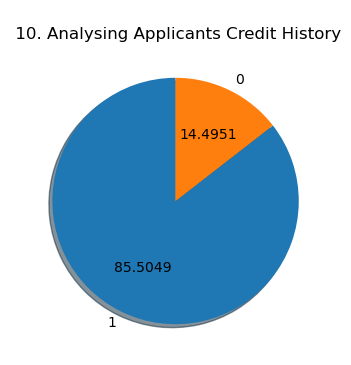

In [80]:
plt.figure(figsize=(4,4))
plt.title('\n 10. Analysing Applicants Credit History')
plt.pie(df['credit_history'].value_counts(),startangle=90,autopct='%.4f',labels=['1', '0'],shadow= True)
plt.show()

# here in the below PIE CHART we found that :
# Applicant with 1 credit History = 85.50 %
# Applicant with 0 credit History = 14.49 %

In [81]:
# 11) Analysing Mordgaged Propert Area ======>>>

In [82]:
df['property_area'].unique()
# there is 'urban' 'rural' & 'semiurban' unique areas are present in the column

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [83]:
df['property_area'].nunique()
# there are 3 unique values are present in the column

3

In [84]:
df['property_area'].value_counts()
# below is the distribution of different areas of property

Semiurban    233
Urban        202
Rural        179
Name: property_area, dtype: int64

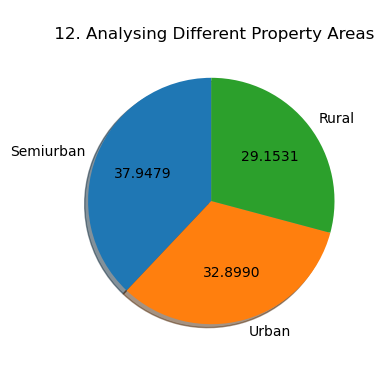

In [85]:
plt.figure(figsize=(4,4))
plt.title('\n 12. Analysing Different Property Areas')
plt.pie(df['property_area'].value_counts(),startangle=90,autopct='%.4f',labels=['Semiurban', 'Urban','Rural'],shadow= True)
plt.show()

# here in the below PIE CHART we found that :
# all the three area are almost similar but with minor differences i.e :
# 1) Semi-Urban area properties with = 37.94 %
# 2) Urban Area Properties with = 32.89 %
# 3) Rural Area Properties with = 29.15 %

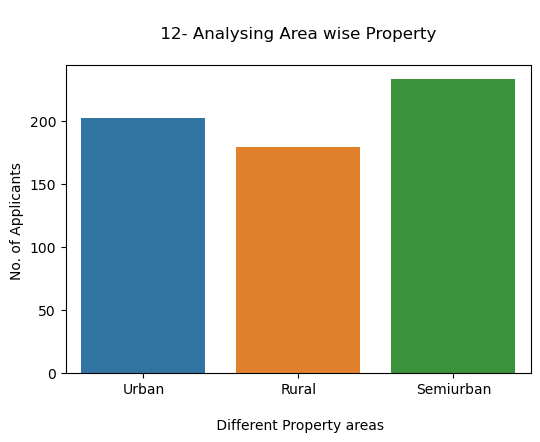

In [86]:
plt.figure(figsize = (6,4), facecolor='white')
plt.title('\n 12- Analysing Area wise Property \n')
sns.countplot(x='property_area', data=df)
plt.xlabel('\n Different Property areas', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
plt.ylabel('No. of Applicants ', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()


In [87]:
# 13) Analysing Loan Status ====>>>>>>

In [88]:
df['loan_status'].unique()

array(['Y', 'N'], dtype=object)

In [89]:
df['loan_status'].value_counts()

Y    422
N    192
Name: loan_status, dtype: int64

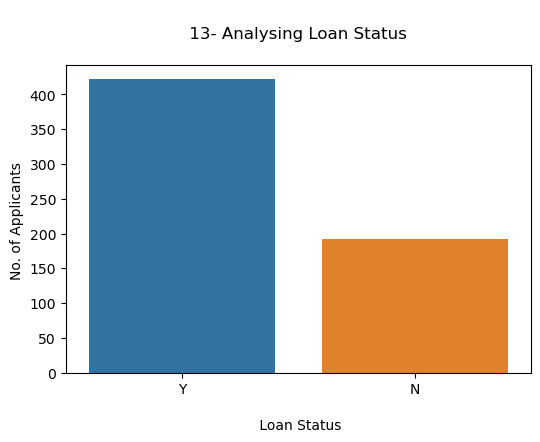

In [90]:
plt.figure(figsize = (6,4), facecolor='white')
plt.title('\n 13- Analysing Loan Status \n')
sns.countplot(x='loan_status', data=df)
plt.xlabel('\n Loan Status', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
plt.ylabel('No. of Applicants ', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

# out of 614 Applicants = 422 got their loans & 192 rejected

======================================== UNIVARIATE ANALYSIS COMPLETED ===========================================

================ APPLYINNG BIVARIATE & MULTI-VARIATE ANALYSIS ===============================

In [91]:
# HERE BELOW WE ARE GOING TO ANALYSE SOME RELEVANT COLUMNS WITH LOAN STATUS BY BIVARIATE & MULTI-VARIATE ANALYSIS METHODS.

In [92]:
# 1) Analysing Loan Status with Self Employement ========>

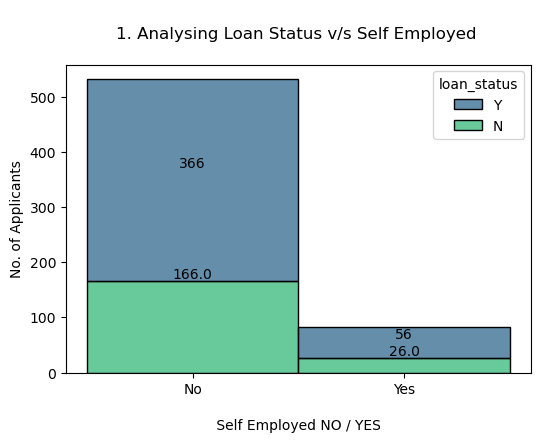

In [93]:
plt.figure (figsize = (6,4), facecolor = "white")
plt.title('\n1. Analysing Loan Status v/s Self Employed \n')
ax = sns.histplot (x= 'self_employed', hue = 'loan_status', data= df,palette = "viridis",multiple="stack")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
# plt.xticks(rotation=30, ha = 'right')
plt.xlabel('\n Self Employed NO / YES ')
plt.xticks (rotation = 0, ha= 'center')
plt.ylabel('No. of Applicants')
# plt.yticks (rotation = 0, ha='center')
# plt.legend(loc= 'center', fontsize=6)
plt.show()

#  here below we are comparing LOAN STATUS with SELF EMPLOYEMENT of applicant.
#  so we found here that, we saw earlier that......
#                     TOTAL NO. OF NON-SELF EMPLOYED APPLICANTS ARE = 532 (APPROVED=366,  REJECTED=166)
# Similarly for ......TOTAL SELF EMPLOYED APPLICANTS ARE = 82 (APPROVED= 56,  REJECTED = 26)


In [94]:
# 2) Analysing Loan Status with Dependents =========>>>>>>

In [95]:
df['dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: dependents, dtype: int64

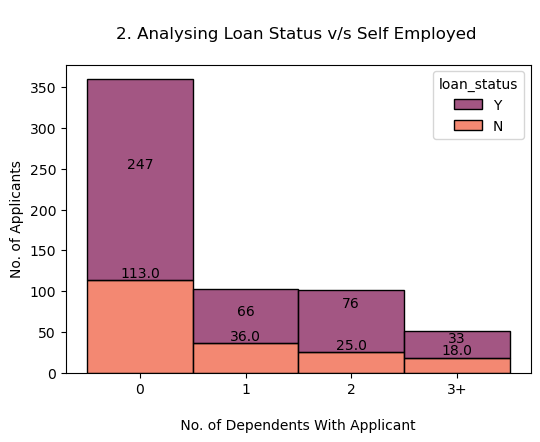

In [96]:
plt.figure (figsize = (6,4), facecolor = "white")
plt.title('\n2. Analysing Loan Status v/s Self Employed \n')
ax = sns.histplot (x= 'dependents', hue = 'loan_status', data= df,palette = "rocket",multiple="stack")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
# plt.xticks(rotation=30, ha = 'right')
plt.xlabel('\n No. of Dependents With Applicant ')
plt.xticks (rotation = 0, ha= 'center')
plt.ylabel('No. of Applicants')
# plt.yticks (rotation = 0, ha='center')
# plt.legend(loc= 'center', fontsize=6)
plt.show()

#  here below we are comparing LOAN STATUS with DEPENDENTS of applicant.
#  so we found here that, we saw earlier that......
#  TOTAL NO. OF APPLICANTS WITH '0' DEPENDENTS ARE = 360 (out of which- APPROVED = 247 (68.61%),   REJECTED = 113 (31.38%))
#  TOTAL NO. OF APPLICANTS WITH '1' DEPENDENTS ARE = 102 (out of which- APPROVED = 66 (64.70%),   REJECTED = 36 (35.29%))
#  TOTAL NO. OF APPLICANTS WITH '2' DEPENDENTS ARE = 101 (out of which- APPROVED = 76 (75.24%),   REJECTED = 25 (24.75%))
#  TOTAL NO. OF APPLICANTS WITH '3+' DEPENDENTS ARE = 51 (out of which- APPROVED = 33 (64.70%),   REJECTED = 18 (35.29%))

# here from the above analysis we found that , Highest No. Of Applicants are having '0' dependents on them (may bachlers)
# .....                                                                                the APPROVAL PERCENT is = 68.61 %
# the HIGHEST APPROVAL (% wise) is with '2' DEPENDENTS = 75.24%

In [97]:
# 3) Analysing Loan Status v/s Applicants Income =========>>>>>

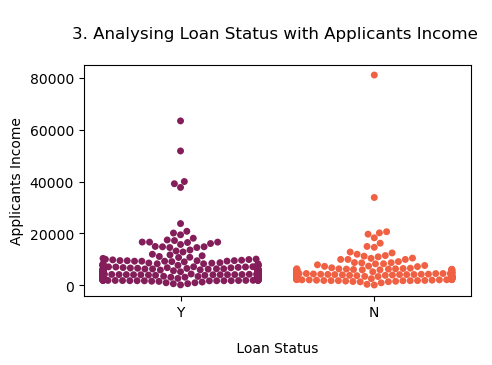

In [98]:
plt.figure (figsize = (5,3), facecolor = "white")
plt.title('\n3. Analysing Loan Status with Applicants Income \n')
sns.swarmplot (x= 'loan_status', y = 'applicant_income', data= df, palette = "rocket")
# plt.xticks(rotation=30, ha = 'right')
plt.xlabel('\n Loan Status ')
plt.xticks (rotation = 0, ha= 'center')
plt.ylabel('Applicants Income')
# plt.yticks (rotation = 0, ha='center')
# plt.legend(loc= 'center', fontsize=6)
plt.show()

# we can find here in the below swarmplot , that with higher income ,approaval rate is also increasing 
# here we can see an exception also in REJECTED AREA , with the income of 80,000 or above but the loan-status is REJECTED...
#  ....there may be some other reasons behind it. we can analyse them further.

In [99]:
#  4) Analysing Loan Status with Loan Amount ====>>>>

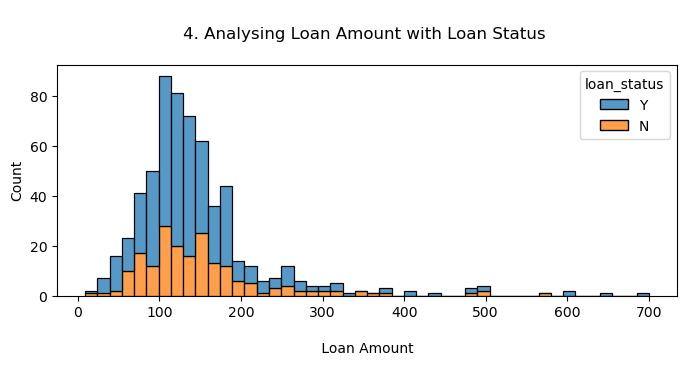

In [100]:
plt.figure (figsize = (8,3), facecolor = "white")
plt.title('\n4. Analysing Loan Amount with Loan Status \n')
sns.histplot(data=df, x="loan_amount", hue="loan_status", multiple="stack")
# plt.xticks(rotation=30, ha = 'right')
plt.xlabel('\n Loan Amount ')
# plt.xticks (rotation = 0, ha= 'center')
# plt.ylabel('No. of employees')
# plt.yticks (rotation = 0, ha='center')
# plt.legend(loc= 'center', fontsize=6)
plt.show()

# here in the below histogram we find that maximum no. of applicants are applied for loan_amount between $ 50 - 150
# ... and the highest loan amount sanctioned is in between $ 100 -120
# there is also a few approvals near about $ 500

In [101]:
# 5) Analysing Loan Status with Loan Amount & Property_area ==========>>>>

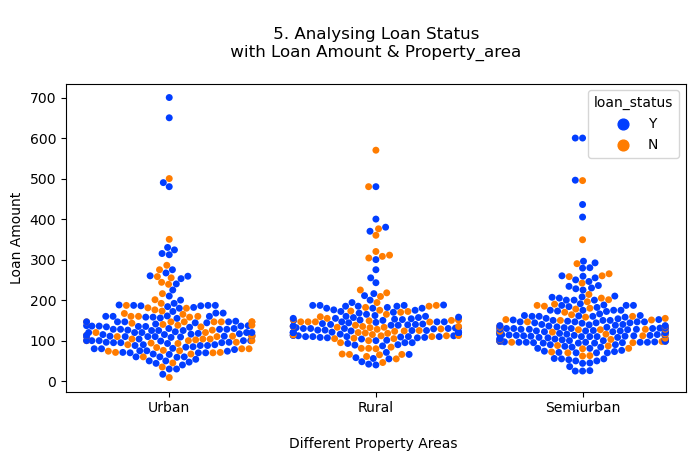

In [102]:
plt.figure(figsize=(8,4),facecolor="white")
plt.title('\n 5. Analysing Loan Status \n with Loan Amount & Property_area \n')
sns.swarmplot (x= 'property_area', y= 'loan_amount',hue = 'loan_status', data= df, palette = "bright")
plt.xlabel ('\nDifferent Property Areas ')
plt.xticks(rotation=0, ha='center',fontsize=10)
plt.ylabel('Loan Amount')
plt.show()

# here in below SWARM PLOT we can clealry identifies that :
# 1) Maximum Number Of Applicants Are in SEMI-URBAN AREA > URBAN-AREA > RURAL-AREA
# 2) Maximum No. of Loan Sanctions are from SEMI-URBAN AREA
# 3) Maximum No. of Loan Rejections are from RURAL AREA
# 4) HIGHEST AMOUNT of SANCTIONED LOAN is from URBAN-AREA , then SEMI-URBAN

In [103]:
# 6) Analysinng Loan Status with Credit History & Loan Amount =======>>>>>>

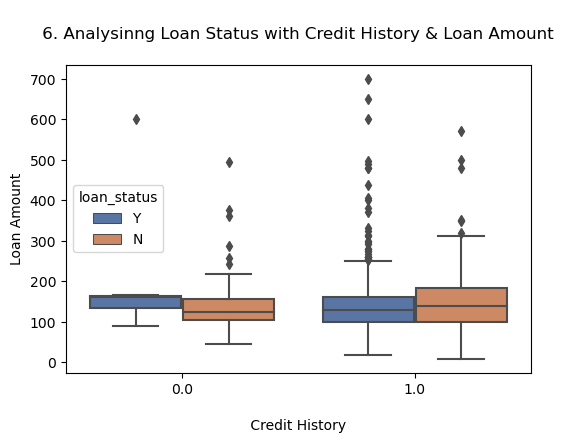

In [104]:
plt.figure(figsize=(6,4),facecolor="white")
plt.title('\n 6. Analysinng Loan Status with Credit History & Loan Amount \n')
sns.boxplot (x= 'credit_history', y= 'loan_amount',hue = 'loan_status', data= df, palette = "deep")
plt.xlabel ('\n Credit History ')
plt.xticks(rotation=0, ha='center',fontsize=10)
plt.ylabel('Loan Amount')
# plt.legend(loc='center')
plt.show()

# credit history = 0 & 1 (0- it could may be 'Not Available') & ('1' could may 'Available')
# so in the below boxplot we can see clearly , those applicnats with 'available' or 'good credit history' are having HIGHER....
# ...CHANCES of APPROVAL OF LOAN
# and we can see that with "credit history-1" HIGHESHT NUMBER OF LOAN APPROVALS are there.

=============  UPTO HERE UNIVARIATE, BIVARIATE & MULTIVARIATE ANALYSIS PART OF EDA IS COMPLETED =========================

In [105]:
df.shape

(614, 12)

In [106]:
df.head()

,gender,marital_status,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [107]:
# here above we can fidn that there are 'object' datatype is also present in our dataset.
# so before moving ahead , we have to ENCODE them.
# by using ENCODING TECHNIQUES

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              614 non-null    object 
 1   marital_status      614 non-null    object 
 2   dependents          614 non-null    object 
 3   education           614 non-null    object 
 4   self_employed       614 non-null    object 
 5   applicant_income    614 non-null    int64  
 6   coapplicant_income  614 non-null    float64
 7   loan_amount         614 non-null    float64
 8   loan_amount_term    614 non-null    float64
 9   credit_history      614 non-null    float64
 10  property_area       614 non-null    object 
 11  loan_status         614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [109]:
# out of 12 columns we are having 7- object datatype columns:
# gender, marital_status, dependents, education, self_employed, property area, loan status
# these all above columns are also CATEGORICAL COLUMNS
#  so we need to ENCODE them first, with the help of LABEL INCODER.
# for this we need to import LABEL INCODER FIRST

In [110]:
from sklearn.preprocessing import LabelEncoder


In [111]:
le = LabelEncoder()

In [112]:
df["gender"] = le.fit_transform(df["gender"])
df["marital_status"] = le.fit_transform(df["marital_status"])
df["dependents"] = le.fit_transform(df["dependents"])
df["education"] = le.fit_transform(df["education"])
df["self_employed"] = le.fit_transform(df["self_employed"])
df["property_area"] = le.fit_transform(df["property_area"])
df["loan_status"] = le.fit_transform(df["loan_status"])

In [113]:
df.dtypes
# here we can see that the all 'object' datatypes are successfully converted into 'integer' datatype

gender                  int32
marital_status          int32
dependents              int32
education               int32
self_employed           int32
applicant_income        int64
coapplicant_income    float64
loan_amount           float64
loan_amount_term      float64
credit_history        float64
property_area           int32
loan_status             int32
dtype: object

In [114]:
df.head()
# here also we can see the change

,gender,marital_status,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


============ FINDING CORRELATION IN DATASET ========================

In [115]:
cor = df.corr()
cor

# here finding non graphically correlation, here we can see that it is difficult to understand this kind of correlation....
# ....so further we find the correlation graphically by HEAT MAP.

,gender,marital_status,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
marital_status,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
self_employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
applicant_income,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
coapplicant_income,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
loan_amount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
loan_amount_term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
credit_history,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


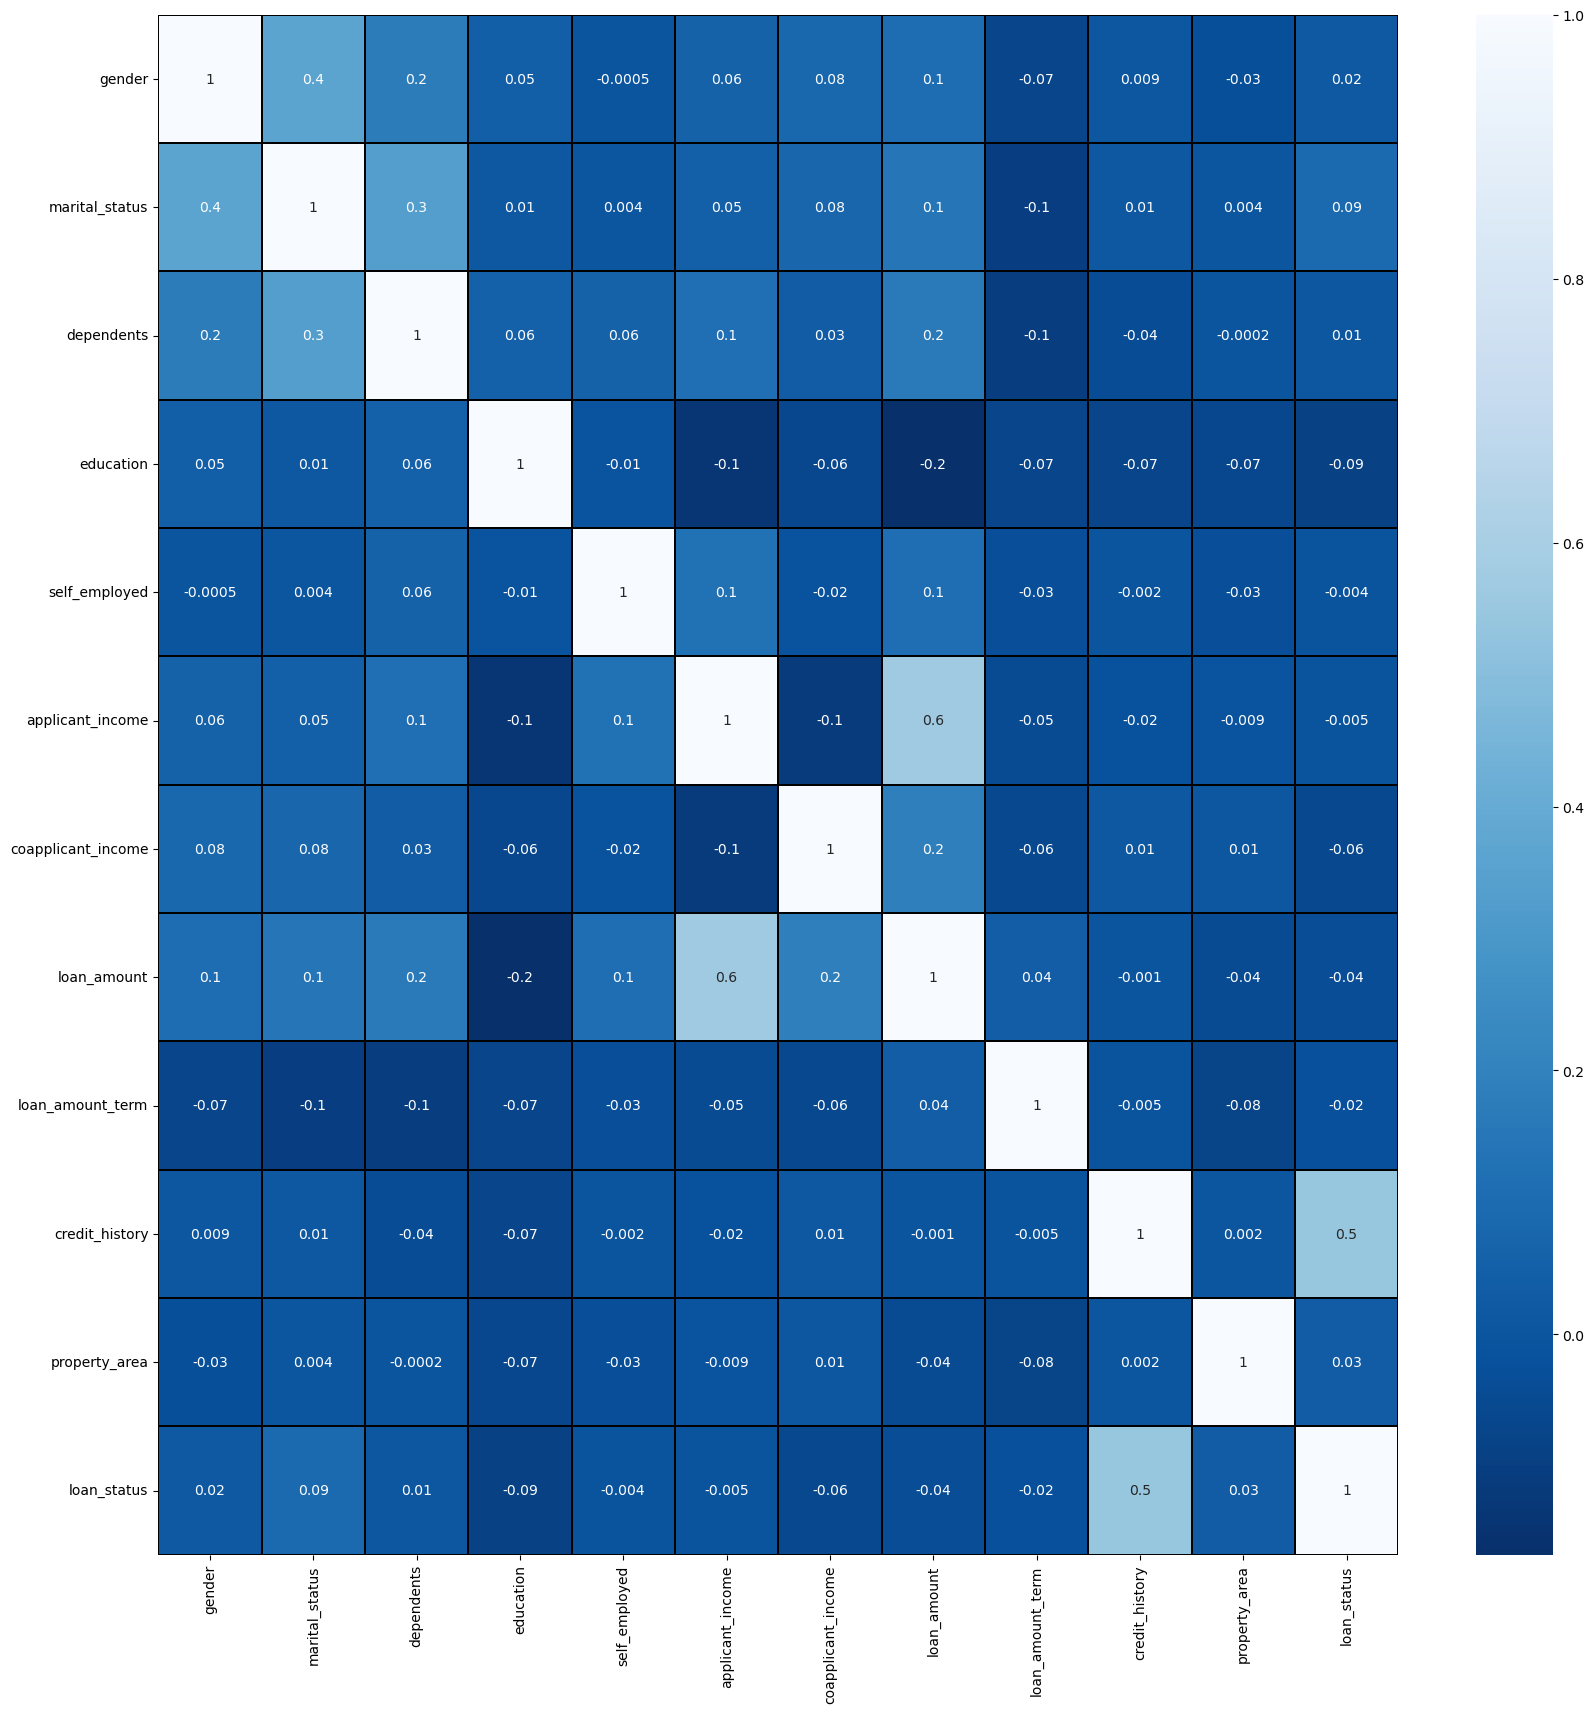

In [116]:
plt.figure (figsize = (20,20), facecolor = "white")
sns.heatmap(df.corr(),linewidth=0.1,fmt="0.1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()


# here we can see below that NO COLUMNS are having Highly Correlation with each other

In [117]:
cor['loan_status'].sort_values(ascending=False)
# here in the below table we can see that the HIGHLY CORRELATED COLUMN IS- CREDIT HISTORY with 0.54 value
# which considered as not much value.
# that means there is no CORRELATION of columns with each other.

loan_status           1.000000
credit_history        0.540556
marital_status        0.091478
property_area         0.032112
gender                0.017987
dependents            0.010118
self_employed        -0.003700
applicant_income     -0.004710
loan_amount_term     -0.022549
loan_amount          -0.036416
coapplicant_income   -0.059187
education            -0.085884
Name: loan_status, dtype: float64

CHECKING FOR OUTLIERS ======================================================================================================

In [118]:
df.describe()
# here in the describe methode we are getting soo many STATISTICAL INFORMATION about the dataset for each column.
# 1. first of all above we are getting 'count' for each of the column.
#                 as we know the total number of row counts for each column is 1,470. and here we are getting count for each..
#                 ... column is smame. not a single blank/'nan' is present in any of the column.

# 2. MEAN : In this, we can get MEAN VALUE for the every column.
# 3. STD : which is Standard Deviation , which shows that how the data of the column is deviate from its MEAN.
# 4. MIN : It shows the Minimum value present in the column.
# 5. 25% : It gives us the 25th Percentile Value in the column.
# 6. 50% : It gives us the 50th Percentile Value in the column.
# 7. 75% : It gives us the 75th Percentile Value in the column.
# 8. Max : It gives us the MAXIMUM VALUE present the column.

# As If in any column the Difference between the value at 75th Percentile & MAX is Higher then, there may be presence of outlier
# so we have to check the 75th% & MAX for each of the column.


#  here we find that in the following columns there is huge difference betweeen 75% & MAX :
#  1)- Applicant Income, 2)- Co-Applicant Income, 3)-Loan Amount, 
# so in the above mentioned columns there may be presence of outliers, but we have to check all of the columns.

,gender,marital_status,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [119]:
df.columns

Index(['gender', 'marital_status', 'dependents', 'education', 'self_employed',
       'applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [120]:
df.columns.nunique()

12

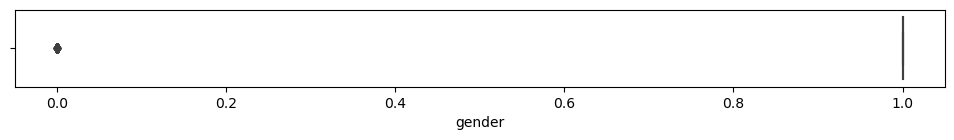

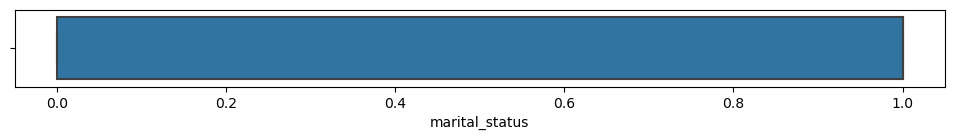

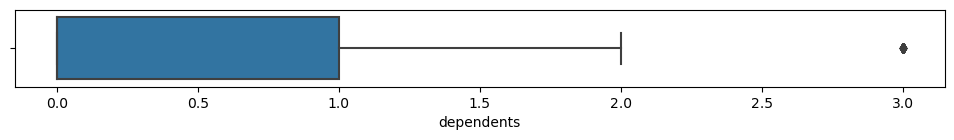

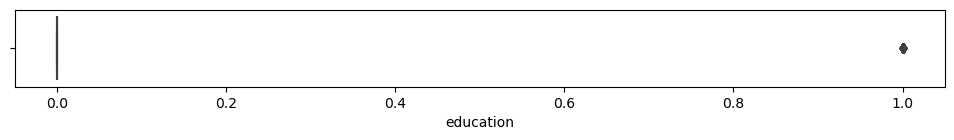

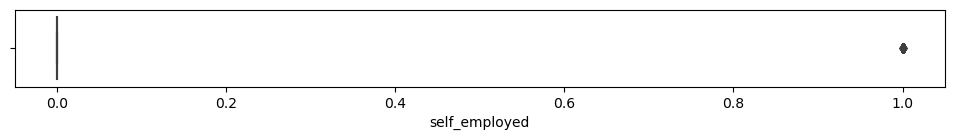

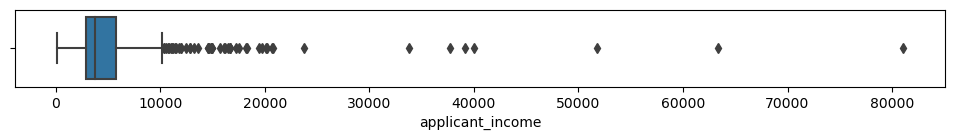

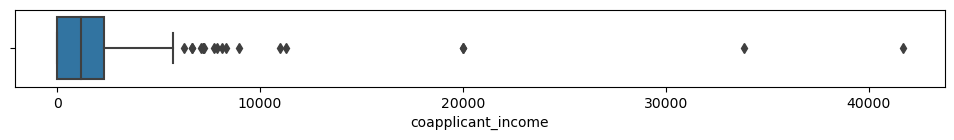

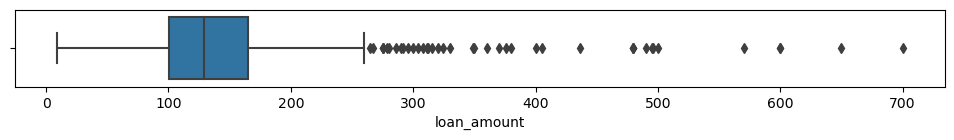

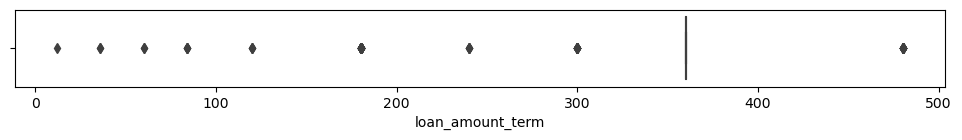

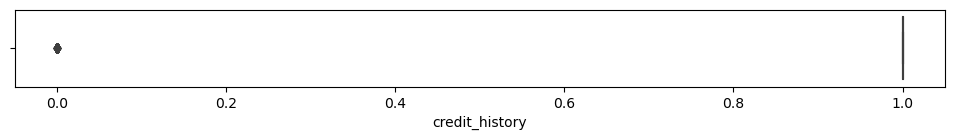

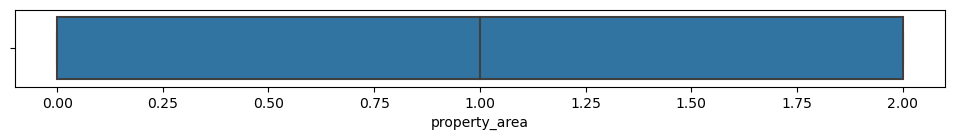

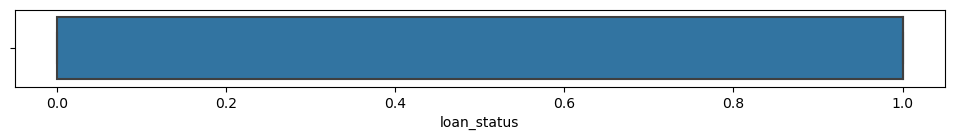

In [121]:
for i in df.columns[0:12]:
    plt.figure (figsize = (12,1), facecolor = "white")
    sns.boxplot(x=i,data=df)
    plt.show()
    
#  here below we can find the outliers for all the cloumns by using boxplot.
#  and we are found outliers in :
#  (1)dependents, (2) Applicant Income,(3) Co-Applicant Income,(4) Loan Amount,(5) Loan Amount Term
# .....are having outliers.
# so out of 12 columns we found OUTLIERS IN 5 COLUMNS , now we have to remove those outliers from out dataset.

========== REMOVING OF OUTLIERS BY USING Z-SCORE METHOD  ====================

In [122]:
#  we can not remove outliers from out TARGET COLUMN, so first we have to seprate target column first.
# For this first we need to identify the ZSCORE VALUES, for which we have to import some libraries.

In [123]:
from scipy.stats import zscore

In [124]:
z = np.abs(zscore(df))
z.head(5)

# by applying 'abs' (absolute method), we are getting all the entries whose z-score value is positive side
#  Ideally we can call the OUTLIERS whos ZSCORE VALUE is LESS THEN 3 AND MORE THEN 3
# so we have to remove all the data whose ZSCORE >3 & <3
#  below here we apllying "abs" i.e absolute method it returns us the all zscore values greater then 3
#  so we just need to remove lesserr then 3 zscore values.

,gender,marital_status,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,0.472343,1.372089,0.737806,0.528362,0.392601,0.072991,0.554487,0.000000,0.273231,0.411733,1.223298,0.674519
1,0.472343,0.728816,0.253470,0.528362,0.392601,0.134412,0.038732,0.219273,0.273231,0.411733,1.318513,1.482537
2,0.472343,0.728816,0.737806,0.528362,2.547117,0.393747,0.554487,0.957641,0.273231,0.411733,1.223298,0.674519
3,0.472343,0.728816,0.737806,1.892641,0.392601,0.462062,0.251980,0.314547,0.273231,0.411733,1.223298,0.674519
4,0.472343,1.372089,0.737806,0.528362,0.392601,0.097728,0.554487,0.064454,0.273231,0.411733,1.223298,0.674519


In [125]:
threshold = 3
print(np.where(z>3))

# here below we found only 38 values,  whose z-score is more then > 3 
# i.e means we are having 38 values which might be outliers,are still present in our dataset,....
# ...and we have to remove those outliers

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [126]:
df_new = df[(z<3).all(axis=1)]
df_new

# here we can see the difference clearly that, earlier there was 614 total rows are there, and now after removing outliers..
# ...there are only 577 rows are present in our dataset.
# so there are  37 OUTLIERS are removed during this process.

,gender,marital_status,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [127]:
df.shape

(614, 12)

In [128]:
df_new.shape

(577, 12)

===============CHECKING REMOVAL OF OUTLIERS BY BOXPLOT (COMPARING  'df'  &  'df_new') ========================

In [129]:
#  (1)dependents, (2) Applicant Income,(3) Co-Applicant Income,(4) Loan Amount,(5) Loan Amount Term

In [130]:
df.columns

Index(['gender', 'marital_status', 'dependents', 'education', 'self_employed',
       'applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [131]:
# 1) Analysing 'Dependents column', Before & After Removing Outliers =======>>>>

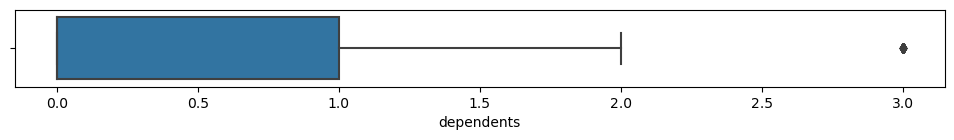

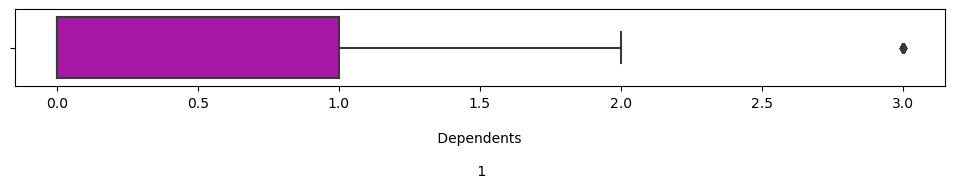

In [132]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='dependents',data=df)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='dependents',data=df_new, color='m')
plt.xlabel('\n Dependents \n\n 1')
plt.show()

# NO- Outliers are removed.
# or we can say algorith is not considered this as a OUTLIER/

In [133]:
# 2) Analysing 'Applicant Income column' before & after removing Outlier ======>>>>

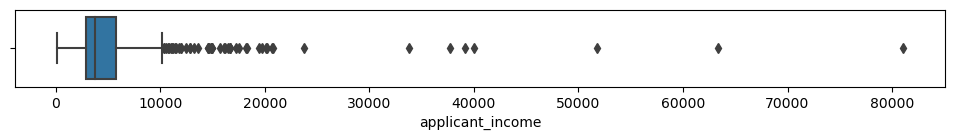

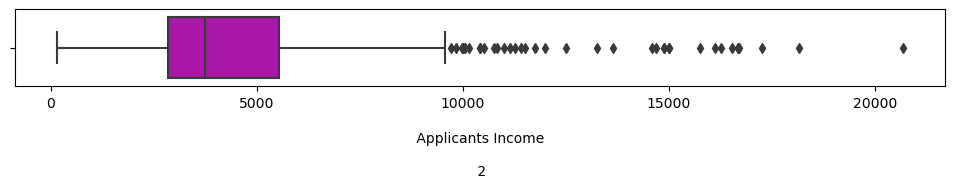

In [134]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='applicant_income',data=df)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='applicant_income',data=df_new, color='m')
plt.xlabel('\n Applicants Income \n\n 2')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from 'APPLICANTS INCOME' column.

In [135]:
# 3) Analysing Co-Applicant Income after Removing Outliers =====>>>>>

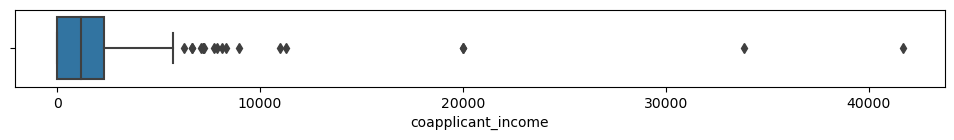

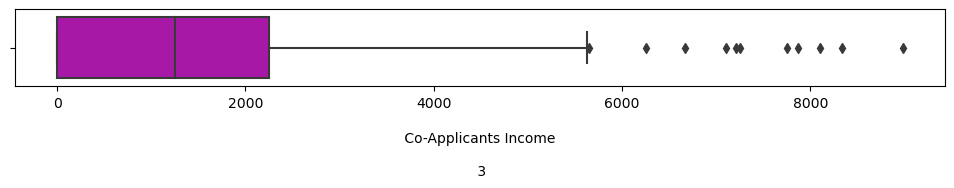

In [136]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='coapplicant_income',data=df)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='coapplicant_income',data=df_new, color='m')
plt.xlabel('\n Co-Applicants Income \n\n 3')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from 'Co-APPLICANTS INCOME' column.

In [137]:
# 4) Analysing Loan Amount column , before & after removing outliers ======>>>

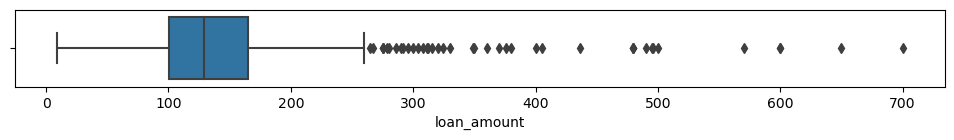

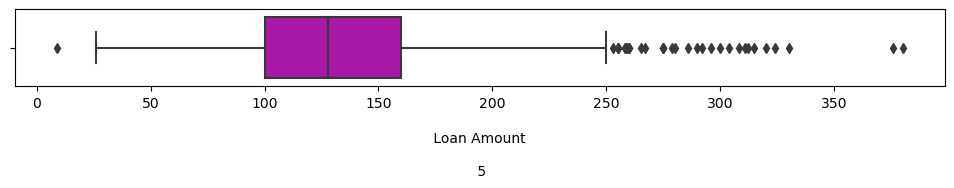

In [138]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='loan_amount',data=df)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='loan_amount',data=df_new, color='m')
plt.xlabel('\n Loan Amount \n\n 5')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from 'LOAN AMOUNT' column.

In [139]:
# 6) Analysing Loan AMount Term column, before & after removing Outliers =========>>>>

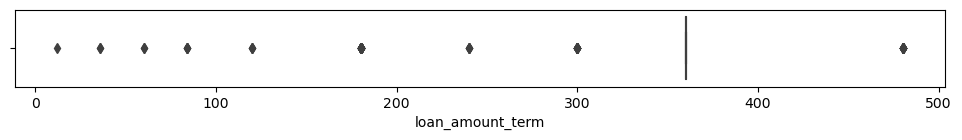

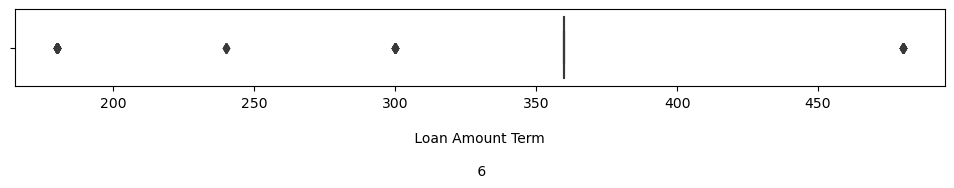

In [140]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='loan_amount_term',data=df)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='loan_amount_term',data=df_new, color='m')
plt.xlabel('\n Loan Amount Term \n\n 6')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from 'Loan Amount Term' column.

============== CHECKING & REMOVING OF OUTLIERS ARE COMPLETED HERE ===============================================

CHECKING SKEWNESS  ======================================================

In [141]:
# the skewness shows the distribution of data, if the data is widely skewed that means it is not good for our model.
#  ideal range of skewness is ( -0.5 to +0.5)
# We can't remove skewness from our Target Column

In [142]:
df_new.skew()
# here in the below table we can see the skewness in the following columns:
# 'gender', dependents, education, self_employed, applicant_income, co-applicant income, loan_amount, loan_amount_term,
# credit_hitory
#  so we have to remove the skewness from the mentioned columns for better results.

gender               -1.622920
marital_status       -0.630211
dependents            1.052106
education             1.306588
self_employed         2.252848
applicant_income      2.148522
coapplicant_income    1.350517
loan_amount           1.113132
loan_amount_term     -2.098806
credit_history       -1.976043
property_area        -0.055332
loan_status          -0.822635
dtype: float64

In [143]:
# so here we are removing the skewness by using 'cuberoot method'

In [144]:
# here we cant remove skewness from the CATEGORICAL COLUMN.
# so we can remove skewness only from the non categorical columns

In [145]:
df_new['applicant_income'] = np.cbrt(df_new['applicant_income'])
df_new['coapplicant_income'] = np.cbrt(df_new['coapplicant_income'])
df_new['loan_amount'] = np.cbrt(df_new['loan_amount'])
df_new['loan_amount_term'] = np.cbrt(df_new['loan_amount_term'])

In [146]:
df_new.skew()

gender               -1.622920
marital_status       -0.630211
dependents            1.052106
education             1.306588
self_employed         2.252848
applicant_income      0.845845
coapplicant_income   -0.038951
loan_amount           0.017152
loan_amount_term     -2.572549
credit_history       -1.976043
property_area        -0.055332
loan_status          -0.822635
dtype: float64

================ REMOVED SKEWNESS, HOWEVER IT IS POSSIBLE ==================

DIVIDING DATA INTO INDEPENDENT & TARGET VARIABLE ===================================================================================================================

In [147]:
df_new.columns

Index(['gender', 'marital_status', 'dependents', 'education', 'self_employed',
       'applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [148]:
x = df_new[['gender', 'marital_status', 'dependents', 'education', 'self_employed',
       'applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_amount_term', 'credit_history', 'property_area']]

In [149]:
y = df_new [['loan_status']]

In [150]:
x.shape

(577, 11)

In [151]:
y.shape

(577, 1)

 APPLYING SCALING TECHNIQUES ==================================================================================================================>>>>>>

In [152]:
# here we need to apply scaling techniques on our dataset,by scaling techniques we normalise the values.
#  we can't apply SCALING TECHNIQUES on TARGET VARIABLE
#  to aplly scaling techinuque we need to import some libraries first.

In [153]:
from sklearn.preprocessing import StandardScaler

In [154]:
st = StandardScaler()

In [155]:
x = st.fit_transform(x)
x

array([[ 0.47713685, -1.36251079, -0.72331271, ...,  0.25126491,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  0.2823534 , ...,  0.25126491,
         0.41851254, -1.30652215],
       [ 0.47713685,  0.73393914, -0.72331271, ...,  0.25126491,
         0.41851254,  1.22747207],
       ...,
       [ 0.47713685,  0.73393914,  0.2823534 , ...,  0.25126491,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  1.28801951, ...,  0.25126491,
         0.41851254,  1.22747207],
       [-2.09583477, -1.36251079, -0.72331271, ...,  0.25126491,
        -2.38941464, -0.03952504]])

In [156]:
xf = pd.DataFrame(data=x)
print(xf)

# here we get our dataset (xf1) after applying SCALING TECHING (STANDARD SCALER)

           0         1         2         3         4         5         6   \
0    0.477137 -1.362511 -0.723313 -0.541961 -0.380580  0.622825 -1.093504   
1    0.477137  0.733939  0.282353 -0.541961 -0.380580  0.157351  0.596681   
2    0.477137  0.733939 -0.723313 -0.541961  2.627567 -0.566533 -1.093504   
3    0.477137  0.733939 -0.723313  1.845150 -0.380580 -0.798730  0.868268   
4    0.477137 -1.362511 -0.723313 -0.541961 -0.380580  0.673686 -1.093504   
..        ...       ...       ...       ...       ...       ...       ...   
572 -2.095835 -1.362511 -0.723313 -0.541961 -0.380580 -0.620151 -1.093504   
573  0.477137  0.733939  2.293686 -0.541961 -0.380580 -0.040329 -1.093504   
574  0.477137  0.733939  0.282353 -0.541961 -0.380580  1.298514 -0.177556   
575  0.477137  0.733939  1.288020 -0.541961 -0.380580  1.161699 -1.093504   
576 -2.095835 -1.362511 -0.723313 -0.541961  2.627567  0.157351 -1.093504   

           7         8         9         10  
0    0.318405  0.251265  0.41

In [157]:
xf.columns

RangeIndex(start=0, stop=11, step=1)

In [158]:
column1 = ['gender', 'marital_status', 'dependents', 'education', 'self_employed',
       'applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_amount_term', 'credit_history', 'property_area']

In [159]:
xf.columns = column1

In [160]:
xf.columns

Index(['gender', 'marital_status', 'dependents', 'education', 'self_employed',
       'applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_amount_term', 'credit_history', 'property_area'],
      dtype='object')

In [161]:
xf.head(5)

,gender,marital_status,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.622825,-1.093504,0.318405,0.251265,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.157351,0.596681,-0.012836,0.251265,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.566533,-1.093504,-1.445145,0.251265,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.798730,0.868268,-0.166705,0.251265,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.673686,-1.093504,0.224069,0.251265,0.418513,1.227472


In [162]:
yf=y

In [163]:
yf.head(2)

,loan_status
0,1
1,0


In [164]:
xf.shape

(577, 11)

In [165]:
yf.shape

(577, 1)

In [166]:
yf.value_counts()
# here we can see that the data isnot balanced.

loan_status
1              398
0              179
dtype: int64

FINDING MULTICOLINEARITY ======================================================================================================================

In [167]:
# We have to find the multicollinearity between the features and to remove it we can use VIF (VARIANCE INFLATION FACTOR)
# we can not apply VIF on the TARGET COLUMN
# for apllyin VIF we have to import some libraries as follows

In [168]:
import statsmodels.api as sm
from scipy import stats
from statsmodels .stats.outliers_influence import variance_inflation_factor

In [169]:
# here we are making "def function" for calculating VIF
def calc_vif(xf):
    vif = pd.DataFrame()
    vif["FETURES"] = xf.columns
    vif["VIF FACTOR"] = [variance_inflation_factor(xf.values,i) for i in range (xf.shape[1])]
    return (vif)

In [170]:
calc_vif(xf)
# here we can't find any Multicolinearity in our dataset

,FETURES,VIF FACTOR
0,gender,1.219442
1,marital_status,1.401732
2,dependents,1.171122
3,education,1.071820
4,self_employed,1.060607
5,applicant_income,1.800793
6,coapplicant_income,1.599874
7,loan_amount,1.617452
8,loan_amount_term,1.058103
9,credit_history,1.010478


RESAMPLING TECHNIQUE (APPLYING SMOTE) ========================================================================================================

In [171]:
# Here we know that our Target Column is a Categorical column. which is having values from 0-1.
# so we have to chek the distribution of values are equal or not, offcourse i would be not, so we have to make them equally
#  'equally balanced distributed' for better results.

# SOLVING CLASS IMMBALANCE PROBLEM BY SMOTE TECHNIQUE.

In [172]:
yf.value_counts()
# here we can clearly see the imbalance in TARGET COULUMN
# for better result and performance of model, we have to first make it balanced.

loan_status
1              398
0              179
dtype: int64

In [173]:
# To solve this prolem we need import SMOTE LIBRARY from the IMBLEARN.

In [174]:
from imblearn.over_sampling import SMOTE

In [175]:
smt = SMOTE()

In [176]:
trainx, trainy = smt.fit_resample(xf,yf)

In [177]:
trainy.value_counts()
# here as you can see below the immbalancenes is cleared now.
# and now our Target Column Categories are BALANCED NOW.

loan_status
0              398
1              398
dtype: int64

In [178]:
trainx.shape

(796, 11)

In [179]:
trainy.shape

(796, 1)

================  UPTO HERE EDA AND OTHER TECHINIQUES ARE COMPLETED ==================================

=============================== NOW WE NEED TO APPLY ML MODELS ======================================================

In [180]:
trainy.nunique()

loan_status    2
dtype: int64

In [181]:
# here above as we know that our target column is CATEGORICAL and having 2 values = 0, 1
# therefore it as an CLASSIFICATION PROBLEM. and we need to apply classification Ml Algorithm

In [182]:
#  Applying TRAIN_TEST_SPLIT ====>>>
#  IMPORTING SOME IMPORTANT REQUIIRED LIBRARIES

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [185]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [186]:
lg = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [187]:
model = [lg,gnb,svc,dtc,knn]

===== FINDING BEST RANDOM STATE FOR LOGISTIC REGRESSION =======

In [188]:
#  FINDING BEST RANDOM STATE FOR LOGISTIC REGRESSION MODEL =====>>>>

In [194]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size=0.20,random_state=i)
    for m in model:
        m.fit(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",m)

Best accuracy is 0.8125 at random state 26
with Best Fitted Model is : KNeighborsClassifier()


In [193]:
# here above we got our...
# ...Best fitted model = KNEIGHBORS CLASSIFIER 
# ...with Accuracy of = 81 % 
# ...& with BEST RANDOM STATE of = 26.
# we can also chek it INDIVIDUALLY.

====== CHECKING MODEL INDIVIDUALLY =======

In [195]:
x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size=0.20,random_state=26)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
knn_pred = knn.predict(x_train)
    
print('Accuracy Score of ', knn,'is:')
print (accuracy_score(y_train,knn_pred))
    
print(confusion_matrix(y_train,knn_pred))
print(classification_report(y_train,knn_pred))
print('\n')



Accuracy Score of  KNeighborsClassifier() is:
0.8333333333333334
[[267  51]
 [ 55 263]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       318
           1       0.84      0.83      0.83       318

    accuracy                           0.83       636
   macro avg       0.83      0.83      0.83       636
weighted avg       0.83      0.83      0.83       636





In [197]:
#  Here above we are getting best results with =  KNeighbors Classifier
# ...with Best Accuracy Score of = 83 %
# ... with Random State of = 26

# Now we can use KNN MODEL as a FINAL MODEL

========= APPLYING KNEIGHBORS CLASSIFIERS AS A FINAL MODEL ================

In [198]:
final_model = KNeighborsClassifier()

In [200]:
x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size=0.20,random_state=26)
final_model.fit(x_train,y_train)
final_model.score(x_train,y_train)
final_model_pred = final_model.predict(x_test)
print(accuracy_score(y_test,final_model_pred))
print(confusion_matrix(y_test,final_model_pred))
print(classification_report(y_test,final_model_pred))

# here KNEIGHBORS CLASSIFIER as FINAL MODEL with ACCURACY OF = 81 %

0.8125
[[66 14]
 [16 64]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        80
           1       0.82      0.80      0.81        80

    accuracy                           0.81       160
   macro avg       0.81      0.81      0.81       160
weighted avg       0.81      0.81      0.81       160



In [202]:
# Making 'def' function to CHECK / VERIFY samples :

In [203]:
xf.shape

(577, 11)

In [204]:
def pred_func(lp):
    lp= lp.reshape(1,11)
    loan_prediction = final_model.predict(lp)
    print(loan_prediction)
    
    if loan_prediction == 0:
        print("Loan Rejected")
    elif (loan_prediction == 1):
        print ("Loan Approved")
    else:
        print('Not Processed')
# making 'def' function to predict Loan Status .

In [205]:
pd.set_option('display.max_columns', None)
xf

# here by making 'display.amx_columns' we can see all the 11 columns of dataset.

,gender,marital_status,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.622825,-1.093504,0.318405,0.251265,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.157351,0.596681,-0.012836,0.251265,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.566533,-1.093504,-1.445145,0.251265,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.798730,0.868268,-0.166705,0.251265,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.673686,-1.093504,0.224069,0.251265,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.620151,-1.093504,-1.302297,0.251265,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,-0.040329,-1.093504,-2.336409,-3.368603,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.298514,-0.177556,1.830577,0.251265,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.161699,-1.093504,0.960923,0.251265,0.418513,1.227472


In [206]:
yf

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [210]:
yf.shape

(577, 1)

In [207]:
# Test Sample 1 (taking data from row no. '0')

In [208]:
lp= np.array([0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.622825,-1.093504,0.318405,0.251265,0.418513,1.227472])
pred_func(lp)

# here below we can see that our model is predictiong [1] Yes Attrition, which as 100% matched to 'Actual Answer'

[1]
Loan Approved


In [209]:
# Test Sample 2 (taking data from row no '613')

In [211]:
lp= np.array([-2.095835,-1.362511,-0.723313,-0.541961,2.627567,0.157351,-1.093504,0.080100,0.251265,-2.389415,-0.039525])
pred_func(lp)

# here below we can see that our model is predictiong [1] Yes Attrition, which as 100% matched to 'Actual Answer'

[0]
Loan Rejected


SAVING MODEL ===================================================================================================================

In [213]:
import pickle

In [214]:
file_name = 'loan_prediction.pkl' 
pickle.dump(final_model,open(file_name,'wb'))

========================================  FINISHED ================================================